In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# converting job_skills to a list
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)



c:\Users\ekene\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
US_DA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
US_DA = US_DA.dropna(subset= ['salary_year_avg'])
us_jobs_skills = US_DA.explode('job_skills')
us_jobs_skills[['job_skills', 'salary_year_avg']]
us_top_skills = us_jobs_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
us_top_skills_top = us_top_skills.sort_values(by= 'count', ascending= False).head(10).sort_values(by= 'median', ascending= False)
US_MEDIAN_PAID = us_top_skills.sort_values(by= 'median', ascending= False).head(10)


<function matplotlib.pyplot.show(close=None, block=None)>

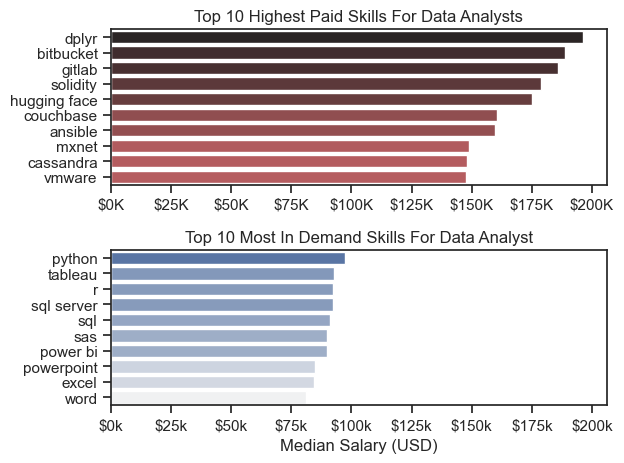

In [9]:
fig, ax= plt.subplots(2,1)
sns.set_theme(style= 'ticks')

sns.barplot(us_top_skills_top, x= 'median', y= us_top_skills_top.index, hue= 'median', palette= 'light:b', ax=ax[1])
ax[1].legend().remove()
# us_top_skills_top[::-1].plot(kind= 'barh', y= 'median', ax=ax[1], legend= False)
ax[1].set_title('Top 10 Most In Demand Skills For Data Analyst')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}k'))


sns.barplot(US_MEDIAN_PAID, x= 'median', y= US_MEDIAN_PAID.index, ax=ax[0], hue= 'median', palette= 'dark:r_r')
ax[0].legend().remove()
#US_MEDIAN_PAID[::-1].plot(kind= 'barh', y= 'median', ax=ax[0], legend= False)
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 Highest Paid Skills For Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show

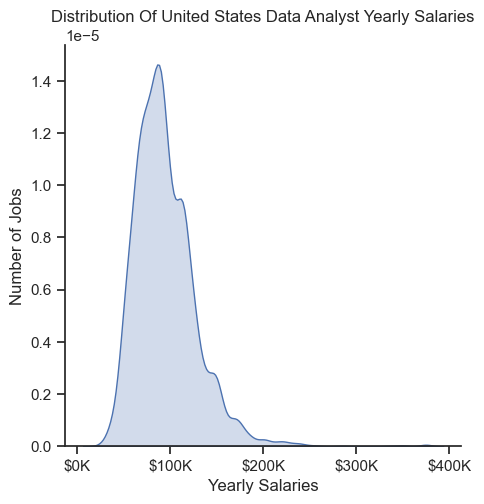

In [13]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
sns.displot(df_DA_US['salary_year_avg'], kind= 'kde', fill= True)
#plt.xlim(0,250000)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title( 'Distribution Of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.show()

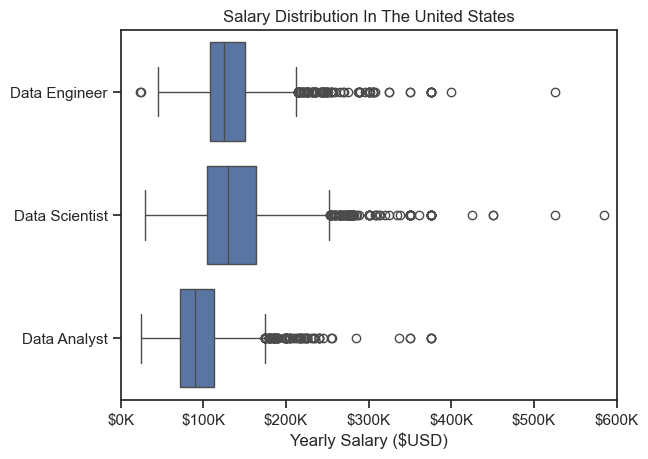

In [17]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')]
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(df_US, x= 'salary_year_avg', y= 'job_title_short')
#plt.boxplot(job_list, tick_labels= job_titles, vert= False)
plt.title('Salary Distribution In The United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()